In [14]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100

In [15]:
all_muts_df = pd.read_pickle("./data/4_7_df.pkl")
display(all_muts_df.shape)

(2641, 45)

In [16]:
len(all_muts_df.exp.unique())

35

In [17]:
cnt_d = dict()
cnt_d["mutations"] = len(all_muts_df)
cnt_d["experiments"] = len(all_muts_df.exp.unique())

In [18]:
COND_COLS = [
    'temperature',
    'carbon-source',
    'supplement',
    'strain-description',
    'taxonomy-id',
    'base-media',
    'nitrogen-source',
    'phosphorous-source',
    'sulfur-source',
    'calcium-source'
]

exp_ale_conds_df = all_muts_df[[
    "exp",
    "ale",
    ] + COND_COLS].copy()
exp_ale_conds_df = exp_ale_conds_df.drop_duplicates()
cnt_d["ALEs"] = len(exp_ale_conds_df)
exp_ale_conds_df = exp_ale_conds_df.rename(columns={"taxonomy-id": "organism"})

for col in COND_COLS:
    exp_ale_conds_df = exp_ale_conds_df.rename(columns={col: col.replace('-', ' ')})

exp_ale_conds_df["organism"] = exp_ale_conds_df.apply(lambda r: "E. coli K-12 MG1655" if r["organism"] == "511145" else r["organism"], axis=1)
exp_ale_conds_df = exp_ale_conds_df.rename(columns={"strain description": "strain"})
exp_ale_conds_df

,exp,ale,temperature,carbon source,supplement,strain,organism,base media,nitrogen source,phosphorous source,sulfur source,calcium source
0,42C,1,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
5,42C,2,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
40,42C,3,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
69,42C,4,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
77,42C,5,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
...,...,...,...,...,...,...,...,...,...,...,...,...
2556,TOL_putrescine,3,37 celsius,glucose(2),putrescine,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2571,TOL_putrescine,4,37 celsius,glucose(2),putrescine,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2587,TOL_putrescine,5,37 celsius,glucose(2),putrescine,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2611,TOL_putrescine,6,37 celsius,glucose(2),putrescine,WT,E. coli K-12 MG1655,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)


In [19]:
# nondefault_supplements = [""]
# rename_d = {
#     "NaCl(0.5g/L) trace elements": "trace elements only",
#     "20uM FeSO4 and 10mM sodium citrate": "FeSO4, sodium citrate",
#     "glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution.": "glycine, L-serine",
#     "KH2PO4(3) Na2HPO4(6.8)": "KH2PO4(3), Na2HPO4(6.8)",
#     "FeSO4(20uM), sodium citrate(10mM)": "FeSO4, sodium citrate"
# }

# exp_ale_conds_df["condition"] = exp_ale_conds_df.apply(lambda r: "trace elements only" if r["condition"]=="NaCl(0.5g/L) trace elements" else r["condition"], axis=1)
exp_ale_conds_df["phosphorous source"] = exp_ale_conds_df.apply(lambda r: "KH2PO4(3), Na2HPO4(6.8)" if r["phosphorous source"] == "KH2PO4(3) Na2HPO4(6.8)" else r["phosphorous source"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "trace elements only" if r["supplement"] == "NaCl(0.5g/L) trace elements" else r["supplement"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "glycine, L-serine" if r["supplement"] == "glycine(2mM)  L-Serine(varying concentration)  trace elements(X1)  Wolfe's vitamin solution." else r["supplement"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "trace elements only" if r["supplement"] == "20uM FeSO4 and 10mM sodium citrate" else r["supplement"], axis=1)
exp_ale_conds_df["supplement"] = exp_ale_conds_df.apply(lambda r: "FeSO4, sodium citrate" if r["supplement"] == "FeSO4(20uM), sodium citrate(10mM)" else r["supplement"], axis=1)

exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "monomethyl succinate(varying)" if r["carbon source"] == "monomethyl succinate" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "m-tartrate(varying)" if r["carbon source"] == "m-tartrate" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-lyxose(varying)" if r["carbon source"] == "D-lyxose" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-arabinose(varying)" if r["carbon source"] == "D-arabinose" else r["carbon source"], axis=1)
exp_ale_conds_df["carbon source"] = exp_ale_conds_df.apply(lambda r: "D-2-deoxyribose(varying)" if r["carbon source"] == "D-2-deoxyribose" else r["carbon source"], axis=1)

exp_ale_conds_df

,exp,ale,temperature,carbon source,supplement,strain,organism,base media,nitrogen source,phosphorous source,sulfur source,calcium source
0,42C,1,42 celsius,glucose(4),trace elements only,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
5,42C,2,42 celsius,glucose(4),trace elements only,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
40,42C,3,42 celsius,glucose(4),trace elements only,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
69,42C,4,42 celsius,glucose(4),trace elements only,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
77,42C,5,42 celsius,glucose(4),trace elements only,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
...,...,...,...,...,...,...,...,...,...,...,...,...
2556,TOL_putrescine,3,37 celsius,glucose(2),putrescine,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
2571,TOL_putrescine,4,37 celsius,glucose(2),putrescine,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
2587,TOL_putrescine,5,37 celsius,glucose(2),putrescine,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)
2611,TOL_putrescine,6,37 celsius,glucose(2),putrescine,WT,E. coli K-12 MG1655,M9,NH4Cl(1),"KH2PO4(3), Na2HPO4(6.8)",MgSO4(0.24),CaCl2(0.1)


In [20]:
CONDITION_COLS = ['temperature', 'carbon source', 'supplement',
       'strain', 'organism', 'base media', 'nitrogen source',
       'phosphorous source', 'sulfur source', 'calcium source']

cond_cat_cnt_df = pd.DataFrame()
for cond_cat in CONDITION_COLS:
    for cond, cond_cat_sample_df in exp_ale_conds_df.groupby([cond_cat]):
        d = {"condition category": cond_cat, "condition": cond, "ALE count": len(cond_cat_sample_df)}
        cond_cat_cnt_df = cond_cat_cnt_df.append(d, ignore_index=True)
cond_cat_cnt_df

,ALE count,condition,condition category
0,198.0,37 celsius,temperature
1,10.0,42 celsius,temperature
2,1.0,D-2-deoxyribose(varying),carbon source
3,2.0,D-arabinose(varying),carbon source
4,2.0,D-lyxose(varying),carbon source
5,6.0,U-13C glucose(2),carbon source
6,4.0,acetate(4),carbon source
7,91.0,glucose(2),carbon source
8,53.0,glucose(4),carbon source
9,3.0,glucose(4) or acetate(4),carbon source


In [21]:
import pickle


with open('./data/annot_cnt_d.pkl', 'rb') as handle:
    uniqu_feat_cnt_d = pickle.load(handle)
    
tot_unique_item_cnt = 0
for v in uniqu_feat_cnt_d.values():
    tot_unique_item_cnt += v

cnt_d["genome annotations"] = tot_unique_item_cnt
cnt_d

{'mutations': 2641,
 'experiments': 35,
 'ALEs': 208,
 'genome annotations': 25321}

In [22]:
# import seaborn as sns
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams["figure.dpi"] = 300
# plt.rcParams['font.sans-serif'] = ["Helvetica"]
# sns.set_context("paper")
# sns.set_style("ticks")


# cnt_df = pd.DataFrame.from_dict(cnt_d, orient='index', columns=["count"])
# cnt_df = cnt_df.sort_values(by="count", ascending=False)
# display(cnt_df)

# ax = cnt_df.plot.barh(
# #     y="count",
# #     x="index",
#     color="#4C72B0",
# #     color="#4169e1",
#     figsize=(2,0.65),
#     width=1
# )

# sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
# ax.get_legend().remove()
# plt.xscale('log')
# ax.tick_params(axis='y', which='major', length=0)

# for tick in ax.get_xticklabels():
#     tick.set_fontname("Helvetica")
# for tick in ax.get_yticklabels():
#     tick.set_fontname("Helvetica")

# cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
# for i, r in cnt_df.iterrows():
#     s = str(int(r["count"]))
#     ax.text(r["count"], i-0.41,  s, fontname="Helvetica")

# plt.savefig("./figs/AVA_mags.svg", format="svg")

,count
promoters,8617
genes,4694
intergenic regions,3744
transcription units,3560
operons,2619
attenuator terminators,752
regulons,493
terminators,306
TF binding sites,207
ribosomal binding sites,179


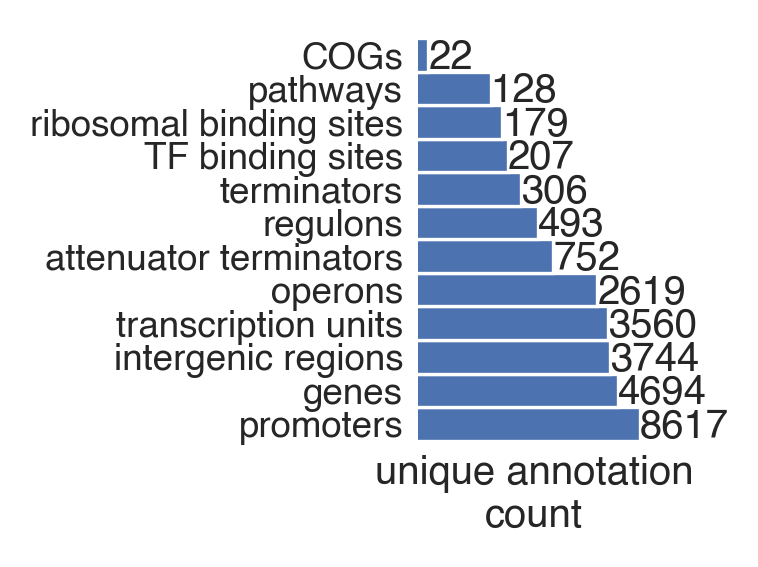

In [67]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")


cnt_df = pd.DataFrame.from_dict(uniqu_feat_cnt_d, orient='index', columns=["count"])
cnt_df = cnt_df.sort_values(by="count", ascending=False)
display(cnt_df)

ax = cnt_df.plot.barh(
#     y="count",
#     x="index",
    color="#4C72B0",
#     color="#4169e1",
    figsize=(1.,1.85),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["count"]))
    ax.text(r["count"], i-0.41,  s, fontname="Helvetica")
    
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_xlabel('unique annotation\ncount', fontname="Helvetica")
ax.xaxis.labelpad = -2

plt.savefig("./figs/AVA_annot_mags.svg", format="svg")

In [24]:
# cond_col_color_pal_d = {
#     "temperature": "PuOr_r",
#     "carbon source": "Greys_d",
#     "nitrogen source": "RdPu_d",
#     "sulfur source": "YlOrBr_d",
#     "phosphorous source": "YlOrRd_d",
#     "supplement": "PuBuGn_d",
#     "strain": "Greens_d",
#     "organism": "Purples_d",
#     "base media": "YlGnBu_d",
#     "calcium source": "bone",
# }

seaborn_palette = "muted"
pal = sns.palettes.SEABORN_PALETTES[seaborn_palette]

cond_col_color_pal_d = {
    "temperature": "PuOr_r",
    "carbon source": "Greys_d",
    "supplement": "PuBuGn_d",
    "strain": "Greens_d",
    "nitrogen source": pal[6],
    "sulfur source": pal[8],
    "phosphorous source": pal[3],
    "organism": pal[4],
    "base media": pal[0],
    "calcium source": pal[5],
}


cond_cat_cnt_colors_df = pd.DataFrame()
for cond_cat, cond_cat_df in cond_cat_cnt_df.groupby(["condition category"]):
    df = cond_cat_df.copy()
    df = df.sort_values(by="ALE count", ascending=True)
    if cond_cat in ["temperature", "carbon source", "supplement", "strain"]:
        colors = sns.color_palette(cond_col_color_pal_d[cond_cat], len(df))
        colors.reverse()  # need to reverse to get the colors in order way I want them for ascending sized conditions.
        if cond_cat !=  "temperature":
            colors.reverse()
    else:
        colors = [cond_col_color_pal_d[cond_cat]]
    df["color"] = colors
    cond_cat_cnt_colors_df = cond_cat_cnt_colors_df.append(df, ignore_index=True)
cond_cat_cnt_colors_df.reset_index(inplace=True, drop=True)  # just making sure that the index is clean
cond_cat_cnt_colors_df["clustermap order"] = cond_cat_cnt_colors_df.index
cond_cat_cnt_colors_df

,ALE count,condition,condition category,color,clustermap order
0,208.0,M9,base media,#4878D0,0
1,208.0,CaCl2(0.1),calcium source,#8C613C,1
2,1.0,D-2-deoxyribose(varying),carbon source,"(0.2277124183006536, 0.2277124183006536, 0.227...",2
3,2.0,D-arabinose(varying),carbon source,"(0.2554248366013072, 0.2554248366013072, 0.255...",3
4,2.0,D-lyxose(varying),carbon source,"(0.2831372549019608, 0.2831372549019608, 0.283...",4
5,2.0,m-tartrate(varying),carbon source,"(0.31084967320261436, 0.31084967320261436, 0.3...",5
6,2.0,monomethyl succinate(varying),carbon source,"(0.338562091503268, 0.338562091503268, 0.33856...",6
7,3.0,glucose(4) or acetate(4),carbon source,"(0.36627450980392157, 0.36627450980392157, 0.3...",7
8,3.0,glucose(4) or glycerol(2.5),carbon source,"(0.39398692810457514, 0.39398692810457514, 0.3...",8
9,3.0,glucose(4) or xylose(4),carbon source,"(0.43250544662309365, 0.43250544662309365, 0.4...",9


In [25]:
cnt_d["conditions"] = len(cond_cat_cnt_colors_df["condition"].unique())

,count
genome annotations,25321
mutations,2641
ALEs,208
conditions,43
experiments,35


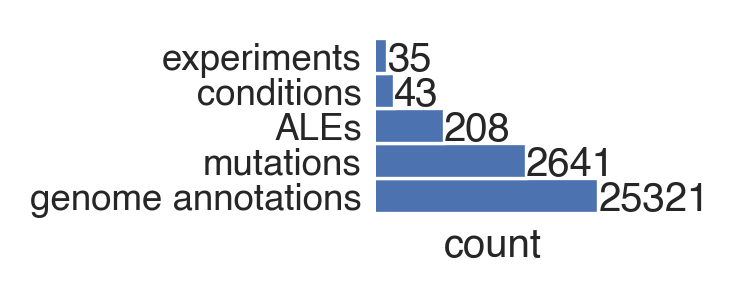

In [62]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")


cnt_df = pd.DataFrame.from_dict(cnt_d, orient='index', columns=["count"])
cnt_df = cnt_df.sort_values(by="count", ascending=False)
display(cnt_df)

ax = cnt_df.plot.barh(
#     y="count",
#     x="index",
    color="#4C72B0",
#     color="#4169e1",
#     figsize=(2,0.85),
    figsize=(1,0.85),
    width=1
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()
plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)

for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["count"]))
    ax.text(r["count"], i-0.41,  s, fontname="Helvetica")

# import matplotlib.ticker
# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.4,0.6,0.8),numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
ax.set_xlabel('count', fontname="Helvetica")
ax.xaxis.labelpad = -2
# ax.get_xaxis().set_visible(False)

plt.savefig("./figs/AVA_mags.svg", format="svg")

In [92]:
LEGEND_BARPLOT_WIDTH = 1.5

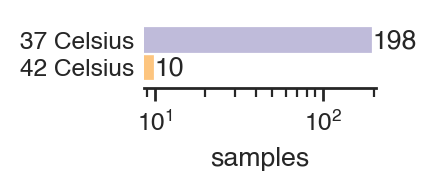

In [93]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
# sns.set_style("white")
sns.set_style("ticks")


CONDITION = "temperature"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace('celsius', "Celsius"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,0.45),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.3,  s, fontname="Helvetica")

plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
#     labelbottom=False,  # labels along the bottom edge are off
#     length=0
# )

# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_xlabel("samples", fontname="Helvetica")
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
plt.savefig("./figs/f2d_1.svg", format="svg")

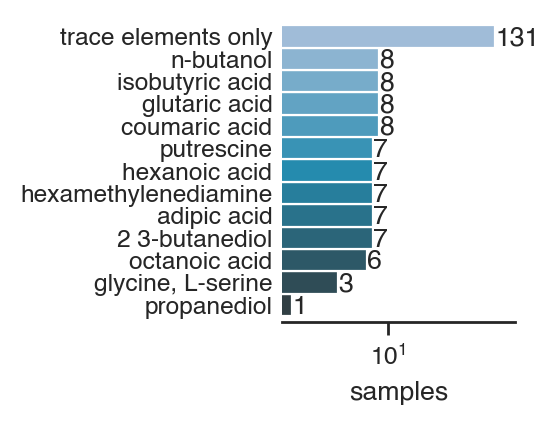

In [94]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")


CONDITION = "supplement"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,2),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.39,  s, fontname="Helvetica")

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
#     labelbottom=False,  # labels along the bottom edge are off
#     length=0
# )
    
plt.xscale('log')
ax.tick_params(axis='y', which='major', length=0)
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
ax.set_xlabel("samples", fontname="Helvetica")
plt.xlim(right=cnt_d["ALEs"])
plt.savefig("./figs/f2d_2.svg", format="svg")

(0.0, 208)

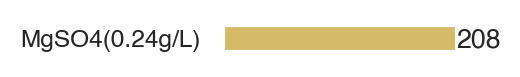

In [95]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "sulfur source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,0.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_3.svg", format="svg")

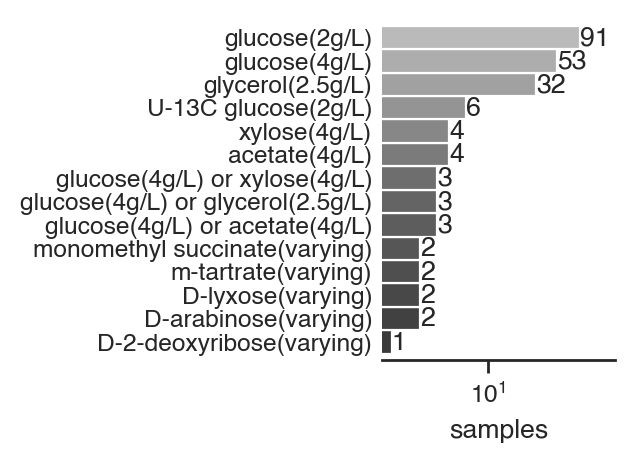

In [96]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")


CONDITION = "carbon source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)") if "varying" not in r["condition"] else r["condition"], axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,2.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.xscale('log')
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
#     labelbottom=False,  # labels along the bottom edge are off
#     length=0
# )
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
ax.set_xlabel("samples", fontname="Helvetica")
ax.tick_params(axis='y', which='major', length=0)
plt.xlim(right=cnt_d["ALEs"])
plt.savefig("./figs/f2d_4.svg", format="svg")

(0.0, 208)

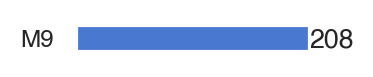

In [97]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "base media"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_5.svg", format="svg")

(0.0, 208)

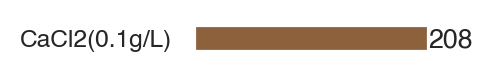

In [98]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "calcium source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_6.svg", format="svg")

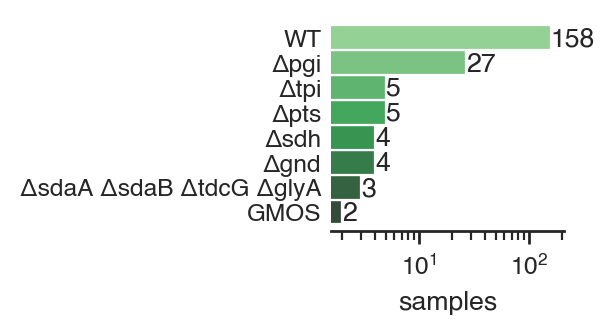

In [99]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("ticks")


CONDITION = "strain"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,1.4),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.xscale('log')    
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     bottom=False,      # ticks along the bottom edge are off
#     labelbottom=False,  # labels along the bottom edge are off
#     length=0
# )
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
ax.set_xlabel("samples", fontname="Helvetica")
ax.tick_params(axis='y', which='major', length=0)
plt.xlim(right=cnt_d["ALEs"])
plt.savefig("./figs/f2d_7.svg", format="svg")

(0.0, 208)

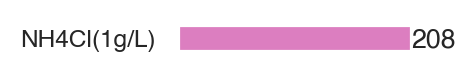

In [100]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "nitrogen source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,0.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_8.svg", format="svg")

(0.0, 208)

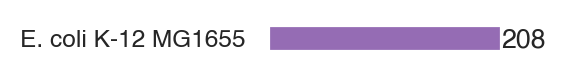

In [101]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "organism"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,0.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_9.svg", format="svg")

(0.0, 208)

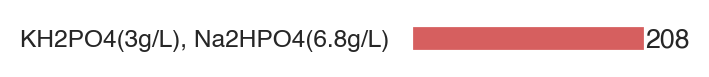

In [102]:
# could create the figure using MPL subplots for automatic alignment. Going to first make them separate.
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["Helvetica"]
sns.set_context("paper")
sns.set_style("white")


CONDITION = "phosphorous source"
cnt_df = cond_cat_cnt_colors_df[cond_cat_cnt_colors_df["condition category"]==CONDITION].copy()
cnt_df["condition"] = cnt_df.apply(lambda r: r["condition"].replace(')', "g/L)"), axis=1)

ax = cnt_df.plot.barh(
    y="ALE count",
    x="condition",
    color=list(cnt_df["color"]),
    figsize=(LEGEND_BARPLOT_WIDTH,0.25),
    width=1,
)

sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)
ax.get_legend().remove()

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")

cnt_df = cnt_df.reset_index()  # Resetting index for the below annotations to work
for i, r in cnt_df.iterrows():
    s = str(int(r["ALE count"]))
    ax.text(r["ALE count"], i-0.33,  s, fontname="Helvetica")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False,  # labels along the bottom edge are off
    length=0
)
    
# ax.set_xlabel("ALEs", fontname="Helvetica")
# ax.set_ylabel(CONDITION, fontname="Helvetica", rotation=0, labelpad=30)
ax.set_ylabel("")
plt.xlim(right=cnt_d["ALEs"])
# plt.savefig("./figs/f2d_10.svg", format="svg")

# Clustermap

In [103]:
cond_to_val_map_d = dict()
for i, r, in cond_cat_cnt_colors_df.iterrows():
    cond_to_val_map_d[r["condition"]] = r["clustermap order"]
cond_to_val_map_d

{'M9': 0,
 'CaCl2(0.1)': 1,
 'D-2-deoxyribose(varying)': 2,
 'D-arabinose(varying)': 3,
 'D-lyxose(varying)': 4,
 'm-tartrate(varying)': 5,
 'monomethyl succinate(varying)': 6,
 'glucose(4) or acetate(4)': 7,
 'glucose(4) or glycerol(2.5)': 8,
 'glucose(4) or xylose(4)': 9,
 'acetate(4)': 10,
 'xylose(4)': 11,
 'U-13C glucose(2)': 12,
 'glycerol(2.5)': 13,
 'glucose(4)': 14,
 'glucose(2)': 15,
 'NH4Cl(1)': 16,
 'E. coli K-12 MG1655': 17,
 'KH2PO4(3), Na2HPO4(6.8)': 18,
 'GMOS': 19,
 'ΔsdaA ΔsdaB ΔtdcG ΔglyA': 20,
 'Δgnd': 21,
 'Δsdh': 22,
 'Δpts': 23,
 'Δtpi': 24,
 'Δpgi': 25,
 'WT': 26,
 'MgSO4(0.24)': 27,
 'propanediol': 28,
 'glycine, L-serine': 29,
 'octanoic acid': 30,
 '2 3-butanediol': 31,
 'adipic acid': 32,
 'hexamethylenediamine': 33,
 'hexanoic acid': 34,
 'putrescine': 35,
 'coumaric acid': 36,
 'glutaric acid': 37,
 'isobutyric acid': 38,
 'n-butanol': 39,
 'trace elements only': 40,
 '42 celsius': 41,
 '37 celsius': 42}

In [104]:
exp_ale_conds_colors_df = exp_ale_conds_df.copy()
exp_ale_conds_colors_df = exp_ale_conds_colors_df.drop(columns=["ale", "exp"])
for cond_col in CONDITION_COLS:
    exp_ale_conds_colors_df[cond_col] = exp_ale_conds_colors_df[cond_col].map(cond_to_val_map_d)

#     exp_ale_conds_colors_df[cond_col] = exp_ale_conds_colors_df[cond_col].map(cond_cat_val_d[cond_col])
exp_ale_conds_colors_df = exp_ale_conds_colors_df.T
# exp_ale_conds_colors_df

In [105]:
# # To set specific row order (ASW-1690)
exp_ale_conds_colors_df = exp_ale_conds_colors_df.reindex([
    'carbon source', 'supplement', 'strain', 'temperature',
    'organism', 'base media', 'nitrogen source', 'phosphorous source',
    'sulfur source', 'calcium source'])
# exp_ale_conds_colors_df

In [106]:
exp_ale_conds_colors_df

,0,5,40,69,77,85,126,134,190,196,204,216,218,221,226,230,240,242,251,255,264,271,275,284,286,290,297,306,308,316,323,333,341,349,357,364,368,373,376,380,385,392,398,404,408,410,416,422,427,429,...,1821,1836,1852,1864,1880,1915,1934,1946,1955,1969,2062,2076,2085,2099,2111,2123,2135,2147,2158,2170,2185,2201,2215,2266,2281,2291,2308,2318,2332,2348,2358,2371,2391,2405,2426,2437,2449,2463,2473,2483,2496,2507,2515,2527,2535,2556,2571,2587,2611,2624
carbon source,14,14,14,14,14,14,14,14,14,14,12,12,12,12,12,12,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,...,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
supplement,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,...,37,37,37,37,37,37,33,33,33,33,33,33,33,34,34,34,34,34,34,34,38,38,38,38,38,38,38,38,39,39,39,39,39,39,39,39,30,30,30,30,30,30,28,35,35,35,35,35,35,35
strain,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,23,23,23,23,23,19,19,21,21,21,21,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,22,22,22,22,24,24,...,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
temperature,41,41,41,41,41,41,41,41,41,41,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
organism,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
base media,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
nitrogen source,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
phosphorous source,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
sulfur source,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
calcium source,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Text(1551.75, 0.5, 'condition')

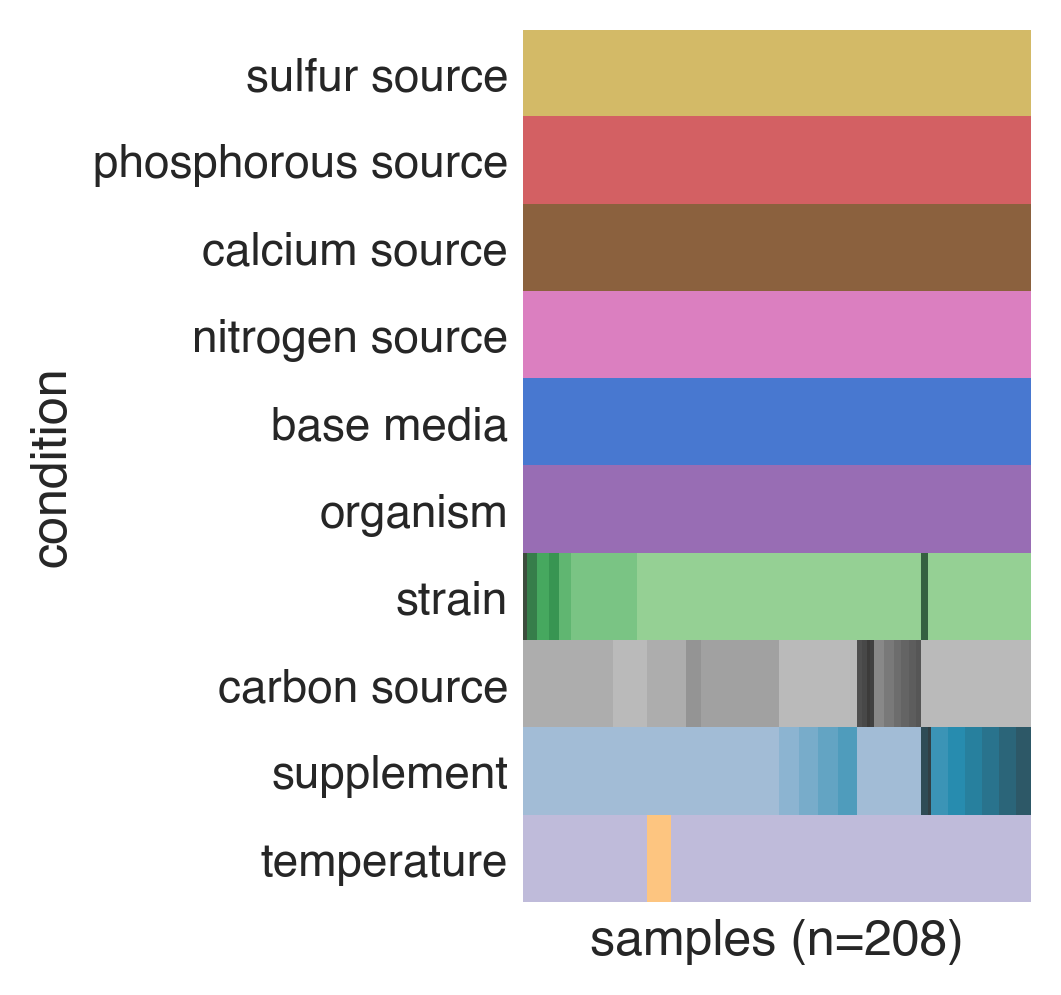

In [107]:
# TODO: use helvetica
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
import matplotlib.colors as mcolors
sns.set(font="Helvetica")

all_colors = list(cond_cat_cnt_colors_df["color"])
all_colors
cmap = mcolors.LinearSegmentedColormap.from_list('n', all_colors)

df = exp_ale_conds_colors_df.copy()

# explicitely setting the clustermap row order
df = df.reindex([
    "sulfur source",
    "phosphorous source",
    "calcium source",
    "nitrogen source",
    "base media",
    "organism",
    "strain",
    "carbon source",
    "supplement",
    "temperature",
])

g = sns.clustermap(
    df,
    xticklabels=False,
    row_cluster=False,  # # To set specific row order (ASW-1690)
#     yticklabels=False,
    cmap=cmap,
#     figsize=(5,10),  # height used with initial
    figsize=(4,4),
    linewidths=0,
)

# Fix for recent matplotlib/seaborn issue
g.ax_heatmap.set_ylim(len(exp_ale_conds_colors_df)+0, -0)

   
# dispaly(clustergrid.dendrogram_row.reordered_ind)
# display(g.dendrogram_row.reordered_ind)

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.cax.set_visible(False)
g.ax_heatmap.yaxis.set_ticks_position('left')
g.ax_heatmap.yaxis.set_label_position("left")
g.ax_heatmap.tick_params(axis='both', which='both', length=0)
# g.ax_heatmap.set_title("Sample condition clustering", y=1.1, fontname="Helvetica")

g.ax_heatmap.set_xlabel("samples (n=" + str(cnt_d["ALEs"]) + ")", fontname="Helvetica")
g.ax_heatmap.set_ylabel("condition", fontname="Helvetica")
# turn off Dark Reader, set DPI = 300, and copy-paste into SVG for f2v2.

In [108]:
MUT_DESCRIPTORS = ["Position", "Mutation Type", "Details", "Sequence Change", "mutation target annotation"]


exp_mut_cnt_df = pd.DataFrame()
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutations",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": len(exp_mut_df),
    }, ignore_index=True)
    
    df = exp_mut_df[MUT_DESCRIPTORS].copy()
    df = df.drop_duplicates()
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutations",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": len(df),
    }, ignore_index=True)

In [109]:
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = dict()
    for _, r in exp_mut_df.iterrows():
        for feat_d in r["genomic features"]:
            feat = feat_d["RegulonDB ID"]
            if feat not in feat_cnt_d.keys():
                feat_cnt_d[feat] = 0
            feat_cnt_d[feat] += 1
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated genomic features",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index=True)
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated genomic features",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

In [110]:
# currently returns the RegulonDB IDs, but that's fine since just currently getting counts.
def _get_feat_cnt_d(mut_df, feat_link_d_col):
    feat_cnt_d = dict()
    for _, r in mut_df.iterrows():
        for feat, links in r[feat_link_d_col].items():
            if feat not in feat_cnt_d.keys():
                feat_cnt_d[feat] = 0
            feat_cnt_d[feat] += len(links)
    return feat_cnt_d

for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = _get_feat_cnt_d(exp_mut_df, "genetic feature links")
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated genetic features",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index=True)
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated genetic features",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

In [111]:
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = _get_feat_cnt_d(exp_mut_df, "operon links")
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated operons",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index="unique")
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated operons",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

In [112]:
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = _get_feat_cnt_d(exp_mut_df, "regulator links")
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated regulons",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index=True)
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated regulons",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

In [113]:
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = _get_feat_cnt_d(exp_mut_df, "pathway links")
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated pathways",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index=True)
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated pathways",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

In [114]:
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    feat_cnt_d = _get_feat_cnt_d(exp_mut_df, "COG links")
    
    mut_feat_cnt = sum(v for v in feat_cnt_d.values())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated COGs",
        "per experiment": "all",
        "experiment name": exp,
        "mutation count": mut_feat_cnt,
    }, ignore_index=True)
    
    uniq_mut_feat_cnt = len(feat_cnt_d.keys())
    exp_mut_cnt_df = exp_mut_cnt_df.append({
        "type": "mutated COGs",
        "per experiment": "unique",
        "experiment name": exp,
        "mutation count": uniq_mut_feat_cnt,
    }, ignore_index=True)

In [115]:
for t, type_df in exp_mut_cnt_df.groupby(["type"]):
    print("all", t, np.median(type_df[type_df["per experiment"]=="all"]["mutation count"]))
    print("unique", t, np.median(type_df[type_df["per experiment"]=="unique"]["mutation count"]))

all mutated COGs 62.0
unique mutated COGs 12.0
all mutated genetic features 87.0
unique mutated genetic features 38.0
all mutated genomic features 87.0
unique mutated genomic features 40.0
all mutated operons 80.0
unique mutated operons 29.0
all mutated pathways 47.0
unique mutated pathways 13.0
all mutated regulons 138.0
unique mutated regulons 22.0
all mutations 51.0
unique mutations 38.0


In [116]:
exp_mut_cnt_df

,experiment name,mutation count,per experiment,type
0,42C,204.0,all,mutations
1,42C,160.0,unique,mutations
2,C13,36.0,all,mutations
3,C13,26.0,unique,mutations
4,Central_carbon_knockout_PTS,31.0,all,mutations
...,...,...,...,...
485,TOL_octanoic_acid,10.0,unique,mutated COGs
486,TOL_propanediol,9.0,all,mutated COGs
487,TOL_propanediol,4.0,unique,mutated COGs
488,TOL_putrescine,118.0,all,mutated COGs


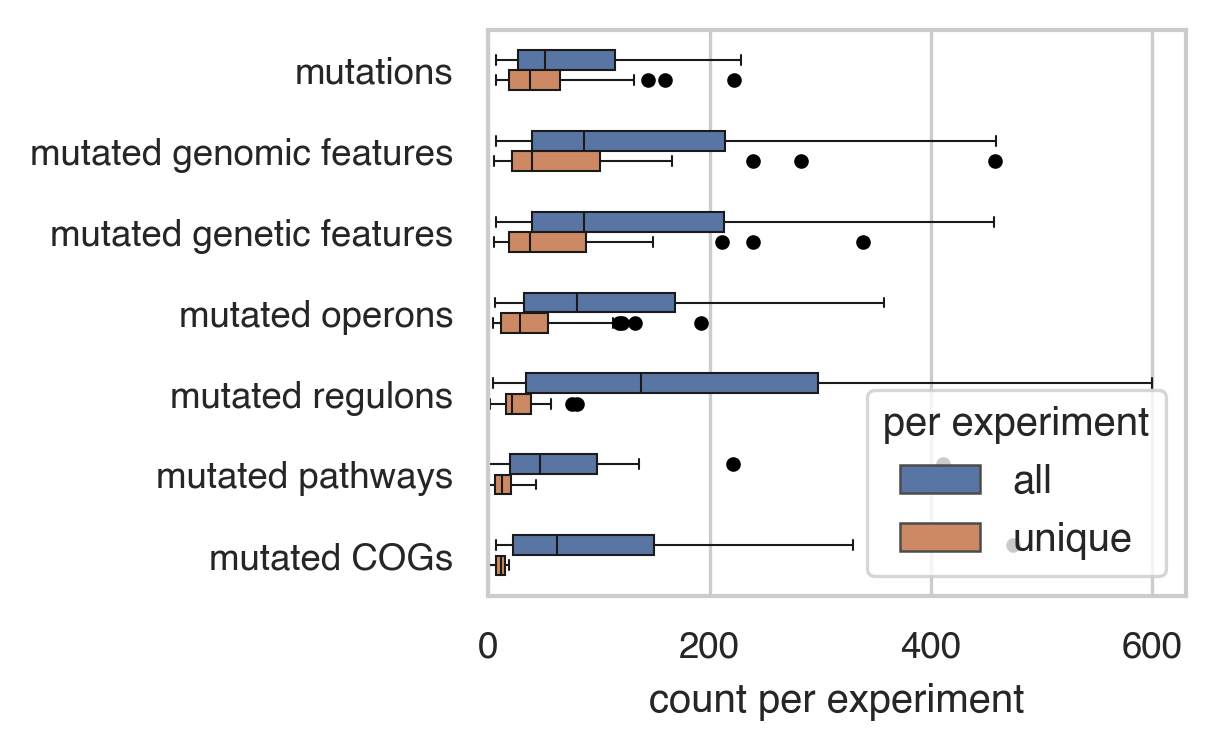

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("deep")


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.5},
    'whiskerprops': {'color': 'k', 'linewidth': 0.5},
#     'medianprops': {'color': 'orange', 'linewidth': 1},
    'medianprops': {'color': 'k', 'linewidth': 0.5},
    'capprops': {'color': 'k', 'linewidth': 0.5},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': None}
}


plt.figure(figsize=(3, 2.5))
ax = sns.boxplot(data=exp_mut_cnt_df,
                 x="mutation count",
                 y="type",
                 hue="per experiment",
                 width=0.5,
#                  color="white",
#                  order=FEAT_ORDER_L,
                 **boxplot_kwargs)
# plt.xscale('log')
plt.xlim(0, None)
# plt.xlim(0, 1000)

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")
ax.set_xlabel("count per experiment", fontname="Helvetica")
ax.set_ylabel("", fontname="Helvetica")

import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Helvetica', style='normal',)
ax.legend(prop=font).set_title('per experiment', prop=font)
plt.savefig("./figs/f2b.svg", format="svg")

In [118]:
print(np.median(exp_mut_cnt_df[(exp_mut_cnt_df["type"]=="mutations") & (exp_mut_cnt_df["per experiment"]=="all")]["mutation count"]))
print(np.median(exp_mut_cnt_df[(exp_mut_cnt_df["type"]=="mutations") & (exp_mut_cnt_df["per experiment"]=="unique")]["mutation count"]))
print(np.median(exp_mut_cnt_df[(exp_mut_cnt_df["type"]=="mutated genomic features") & (exp_mut_cnt_df["per experiment"]=="all")]["mutation count"]))

51.0
38.0
87.0


In [119]:
exp_mut_cnt_df["experiment name"].unique()

array(['42C', 'C13', 'Central_carbon_knockout_PTS',
       'Central_carbon_knockout_glucose_evolution',
       'Central_carbon_knockout_gnd', 'Central_carbon_knockout_pgi',
       'Central_carbon_knockout_sdh', 'Central_carbon_knockout_tpiA',
       'GLU', 'GYD', 'Iron-ALE',
       'MG1655-M9-NC_000913_3gb-stationary-37-D-2-deoxyribose2',
       'MG1655-M9-NC_000913_3gb-stationary-37-D-arabinose2',
       'MG1655-M9-NC_000913_3gb-stationary-37-D-lyxose2',
       'MG1655-M9-NC_000913_3gb-stationary-37-m-tartrate2',
       'MG1655-M9-NC_000913_3gb-stationary-37-monomethyl_succinate2',
       'PGI', 'SER', 'SSW_AC', 'SSW_GLU_AC', 'SSW_GLU_GLY', 'SSW_GLU_XYL',
       'SSW_GLY', 'SSW_XYL', 'TOL_2,3-butanediol', 'TOL_adipic_acid',
       'TOL_coumaric_acid', 'TOL_glutaric_acid',
       'TOL_hexamethylenediamine', 'TOL_hexanoic_acid',
       'TOL_isobutyric_acid', 'TOL_n-butanol', 'TOL_octanoic_acid',
       'TOL_propanediol', 'TOL_putrescine'], dtype=object)

In [120]:
# check for ASW-1628
# Genetic feature mutation counts being higher than genomic feature mutation counts has proven in the past to be problemmatic.
# The below code checks for these types of problems.
# tdf = exp_mut_cnt_df[(exp_mut_cnt_df["per experiment"]=="all")&(exp_mut_cnt_df["type"].isin(["mutated genomic features", "mutated genetic features"]))]
# for e, df in tdf.groupby(["experiment name"]):
#     for _, r in df.iterrows():
#         print(r["experiment name"] + " " + r["type"] + " " + str(r["mutation count"]))

No handles with labels found to put in legend.


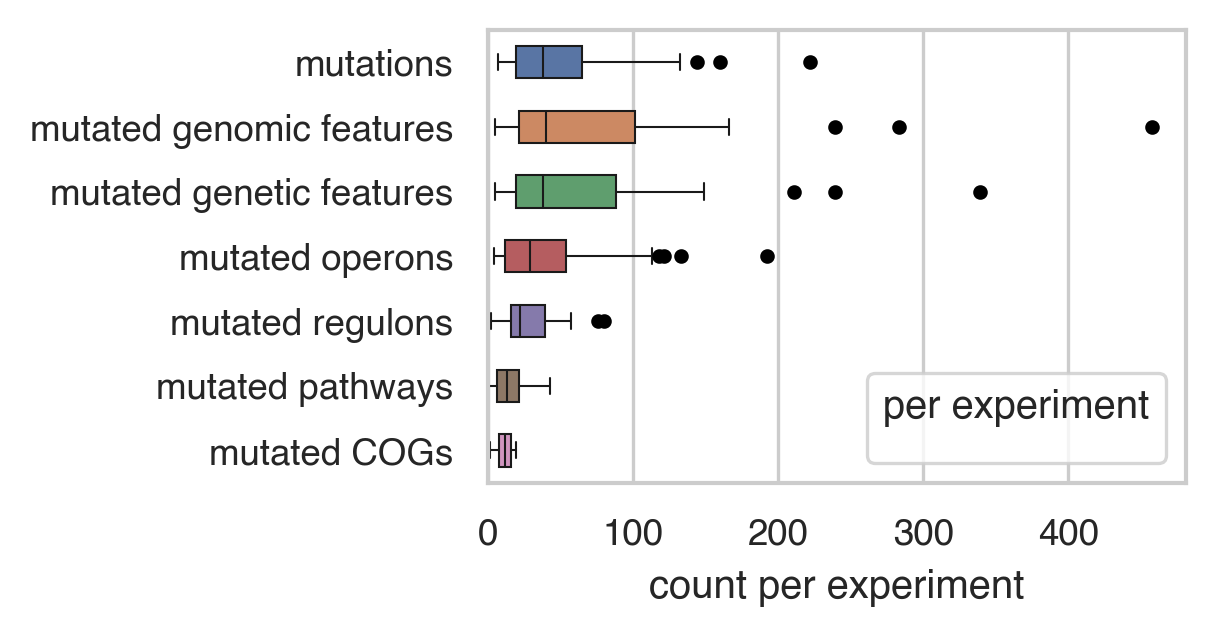

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("deep")


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.5},
    'whiskerprops': {'color': 'k', 'linewidth': 0.5},
#     'medianprops': {'color': 'orange', 'linewidth': 1},
    'medianprops': {'color': 'k', 'linewidth': 0.5},
    'capprops': {'color': 'k', 'linewidth': 0.5},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': None}
}


plt.figure(figsize=(3, 2))
ax = sns.boxplot(data=exp_mut_cnt_df[exp_mut_cnt_df["per experiment"]=="unique"],
                 x="mutation count",
                 y="type",
                 width=0.5,
#                  color="white",
#                  order=FEAT_ORDER_L,
                 **boxplot_kwargs)
# plt.xscale('log')
plt.xlim(0, None)
# plt.xlim(0, 1000)

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")
ax.set_xlabel("count per experiment", fontname="Helvetica")
ax.set_ylabel("", fontname="Helvetica")

import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Helvetica', style='normal',)
ax.legend(prop=font).set_title('per experiment', prop=font)
plt.savefig("fig.svg", format="svg")

In [122]:
all_muts_df["mutation genomic feature count"] = all_muts_df.apply(lambda r: len(r["genomic features"]), axis=1)
all_muts_df

,index,Details,mutation target annotation,Mutation Type,Position,Reference Seq,Sequence Change,ale,exp,flask,isolate,presence,tech_rep,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,mutation genomic feature count
0,2,R110G (CGT→GGT),clsA,SNP,1308318,NaN,G→C,1,42C,124,1,1.0,1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1
1,6,None,rph,DEL,3815859,NaN,Δ82 bp,1,42C,124,1,1.0,1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism'}, {'name': '...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),2
2,7,A734V (GCG→GTG),rpoC,SNP,4187550,NaN,C→T,1,42C,124,1,1.0,1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism'}, {'name': 'Pyri...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1
3,8,D9A (GAT→GCT),hfq,SNP,4400313,NaN,A→C,1,42C,124,1,1.0,1,True,"(4400313, 4400313)",{ECK120000431},"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",False,False,{},{},{},{},{},True,"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",{'ECK120000431': ['ECK120000431']},[{'name': 'yjeF-tsaE-amiB-mutL-miaA-hfq-hflXKC...,{'ECK125147410': ['ECK120000431']},"[{'name': 'CRP', 'significantly associated con...",{'CRP': ['yjeF-tsaE-amiB-mutL-miaA-hfq-hflXKC']},[],{},[{'name': 'Signal transduction mechanisms'}],{'Signal transduction mechanisms': ['ECK125147...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1
4,0,coding (380‑400/1149 nt),nagA,DEL,702352,NaN,Δ21 bp,1,42C,124,1,1.0,1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'CRP', 'significantly associated con...","{'CRP': ['nagBAC-umpH'], 'NagC': ['nagBAC-umpH...","[{'name': 'Galactose metabolism'}, {'name': 'A...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl

In [123]:
mut_types = all_muts_df["Mutation Type"].unique()
mut_type_cnt_df = pd.DataFrame()
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    for mt in mut_types:
        if mt in exp_mut_df["Mutation Type"].unique():
            cnt = len(exp_mut_df[exp_mut_df["Mutation Type"]==mt])
        else:
            cnt = 0
        mut_type_cnt_df = mut_type_cnt_df.append({
            "mutation type": mt,
            "experiment": exp,
            "count": cnt,
        }, ignore_index=True)
mut_type_cnt_df

,count,experiment,mutation type
0,149.0,42C,SNP
1,27.0,42C,DEL
2,23.0,42C,INS
3,4.0,42C,MOB
4,1.0,42C,SUB
...,...,...,...
205,40.0,TOL_putrescine,DEL
206,20.0,TOL_putrescine,INS
207,7.0,TOL_putrescine,MOB
208,0.0,TOL_putrescine,SUB


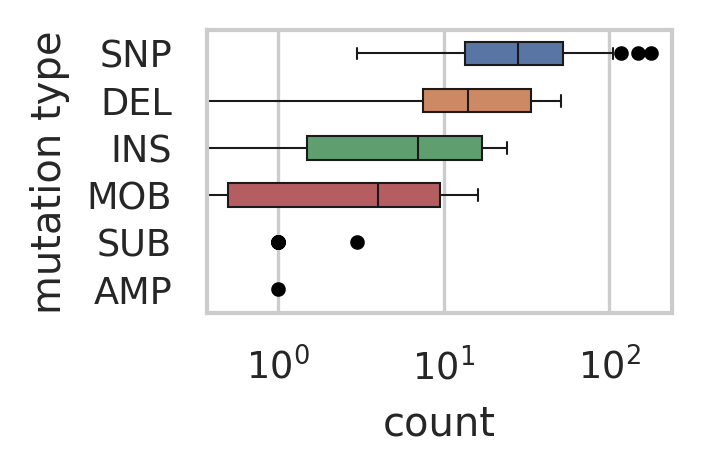

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("deep")


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.5},
    'whiskerprops': {'color': 'k', 'linewidth': 0.5},
#     'medianprops': {'color': 'orange', 'linewidth': 1},
    'medianprops': {'color': 'k', 'linewidth': 0.5},
    'capprops': {'color': 'k', 'linewidth': 0.5},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': None}
}


plt.figure(figsize=(2, 1.25))
ax = sns.boxplot(data=mut_type_cnt_df,
                 x="count",
                 y="mutation type",
#                  hue="experiment",
                 width=0.5,
#                  color="white",
#                  order=FEAT_ORDER_L,
                 **boxplot_kwargs)
plt.xscale('log')
# plt.xlim(0, None)

# for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
# for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")
# ax.set_xlabel("count per experiment", fontname="Helvetica")
# ax.set_ylabel("", fontname="Helvetica")

# import matplotlib.font_manager as font_manager
# font = font_manager.FontProperties(family='Helvetica', style='normal',)
# ax.legend(prop=font).set_title('per experiment', prop=font)
# plt.savefig("fig.svg", format="svg")

41.0

8.0

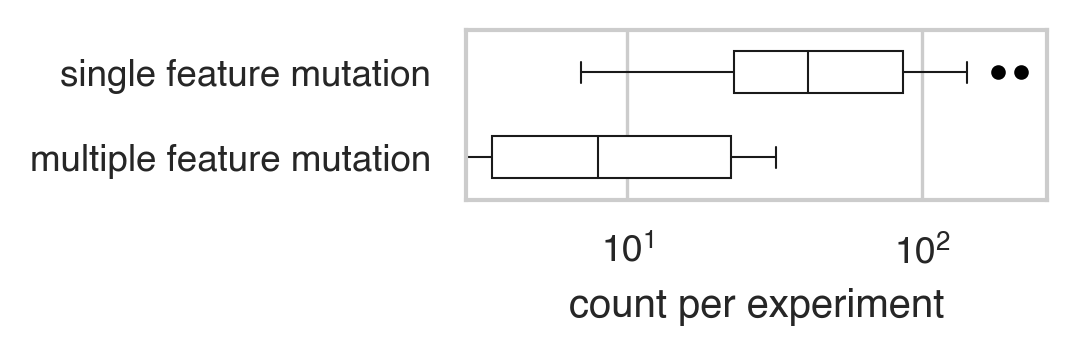

In [125]:
mut_types = all_muts_df["Mutation Type"].unique()
single_or_multi_feat_mut_cnt_df = pd.DataFrame()
for exp, exp_mut_df in all_muts_df.groupby("exp"):
    
    multi_feat_mut_df = exp_mut_df[exp_mut_df["mutation genomic feature count"]>1]
    
    single_or_multi_feat_mut_cnt_df = single_or_multi_feat_mut_cnt_df.append({
        "genomic features per mutation": "single feature mutation",
        "experiment": exp,
        "mutation count": len(exp_mut_df) - len(multi_feat_mut_df),
    }, ignore_index=True)
    
    single_or_multi_feat_mut_cnt_df = single_or_multi_feat_mut_cnt_df.append({
        "genomic features per mutation": "multiple feature mutation",
        "experiment": exp,
        "mutation count": len(multi_feat_mut_df),
    }, ignore_index=True)
    
display(np.median(single_or_multi_feat_mut_cnt_df[single_or_multi_feat_mut_cnt_df["genomic features per mutation"]=="single feature mutation"]["mutation count"]))
display(np.median(single_or_multi_feat_mut_cnt_df[single_or_multi_feat_mut_cnt_df["genomic features per mutation"]=="multiple feature mutation"]["mutation count"]))
    
# single_or_multi_feat_mut_cnt_df.head()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Helvetica"]
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("whitegrid")
# sns.set_palette("deep")


boxplot_kwargs = {
    'boxprops': {'edgecolor': 'k', 'linewidth': 0.5},
    'whiskerprops': {'color': 'k', 'linewidth': 0.5},
#     'medianprops': {'color': 'orange', 'linewidth': 1},
    'medianprops': {'color': 'k', 'linewidth': 0.5},
    'capprops': {'color': 'k', 'linewidth': 0.5},
    'flierprops': {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': None}
}


plt.figure(figsize=(2.5, 0.75))
ax = sns.boxplot(data=single_or_multi_feat_mut_cnt_df,
                 x="mutation count",
                 y="genomic features per mutation",
                 width=0.5,
                 color="white",
#                  order=FEAT_ORDER_L,
                 **boxplot_kwargs)
plt.xscale('log')
# plt.xlim(0, None)

for tick in ax.get_xticklabels(): tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels(): tick.set_fontname("Helvetica")
ax.set_xlabel("count per experiment", fontname="Helvetica")
ax.set_ylabel("", fontname="Helvetica")

# import matplotlib.font_manager as font_manager
# font = font_manager.FontProperties(family='Helvetica', style='normal',)
# ax.legend(prop=font).set_title('per experiment', prop=font)
plt.savefig("fig.svg", format="svg")
plt.show()